<a href="https://colab.research.google.com/github/agatakostrzewa/Supervised_ML/blob/main/1_1_S_ML_Housing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Creating a model to predict whether a house is expensive or not.

In this first phase of the project, the model will have a categorical target: “Expensive” and “Not expensive”. Whenever a ML task involves a categorical target variable, it is called a classification task.

## 1.1 Importing libraries

In [9]:
# This code block is intended to be run each time a new runtime is started in Google Colab.
# Google Colab has a pre-installed version of scikit-learn (1.0.2), but the code requires a newer version (1.2.0 or higher)
# to make use of the .set_output() method. Thus, the command to upgrade the scikit-learn package is run.
#!pip install scikit-learn --upgrade

# If you plan to run the entire notebook again during the same session,
# you can comment out the above command to avoid re-installing the package.
# Now, various libraries and modules are imported to be used later in the code:

# pandas: A popular library for data manipulation and analysis
import pandas as pd

# train_test_split: A function to split datasets into training and testing subsets
from sklearn.model_selection import train_test_split

# SimpleImputer: A preprocessing technique to fill in missing values in datasets
from sklearn.impute import SimpleImputer

# DecisionTreeClassifier: A machine learning model that uses decision trees for classification tasks
from sklearn.tree import DecisionTreeClassifier

# accuracy_score: A function to compute the accuracy of classification models
from sklearn.metrics import accuracy_score

# make_pipeline: A function to create a composite estimator, combining different preprocessing and model steps
from sklearn.pipeline import make_pipeline

# OneHotEncoder: A preprocessing method to convert categorical variables into a form that can be provided to machine learning algorithms
from sklearn.preprocessing import OneHotEncoder

# ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame
from sklearn.compose import ColumnTransformer

# GridSearchCV: Performs grid search with cross-validation over a parameter grid
from sklearn.model_selection import GridSearchCV

# RandomizedSearchCV: Similar to GridSearchCV, but with randomized search on hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# StandardScaler: A preprocessing method that standardizes features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# RandomForestClassifier: An ensemble learning method that fits a number of decision tree classifiers on various sub-samples of the dataset
from sklearn.ensemble import RandomForestClassifier

# OrdinalEncoder: A preprocessing method to encode categorical features as an integer array
from sklearn.preprocessing import OrdinalEncoder

# KNeighborsClassifier: A machine learning model that implements the k-nearest neighbors algorithm for classification tasks
from sklearn.neighbors import KNeighborsClassifier

# Pipeline: A tool to build a sequence of transforms and a final estimator, allowing for convenient modeling workflow
from sklearn.pipeline import Pipeline

## 1.2 Downloading a CSV file from a Google Drive and displaying the DataFrame.

In [2]:
# Importing the pandas library, which is widely used for data manipulation and analysis
import pandas as pd

# Storing a Google Drive URL that points to a specific CSV file
url = "https://drive.google.com/file/d/1TV-AIuArlnuOSLcsA66afqvJvJAnKVDs/view?usp=share_link"

# Modifying the URL to use Google Drive's direct download link format
# This is done by extracting the file ID from the original URL (using url.split('/')[-2]) and appending it to a standard download path
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

# Using pandas to read the CSV file from the modified URL, storing the contents in a DataFrame called 'Data'
Data = pd.read_csv(path)

# Creating a copy of the 'Data' DataFrame and assigning it to 'data'
# This allows further manipulations to 'data' without affecting the original 'Data' object
data = Data.copy()

# Printing the columns of the 'data' DataFrame
data.columns

# Printing the entire 'data' DataFrame
data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## 1.3 Understanding the structure and content of a DataFrame.

In [3]:
# Using the 'info' method to print a concise summary of the 'data' DataFrame
# This will include information about the index dtype, column dtypes, non-null values, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

## 1.4 Data preparation and preprocessing.

In summary, the code is performing data preparation and preprocessing for a machine learning task. The features are divided into numerical and categorical subsets, and different preprocessing pipelines are built for each, including imputation, scaling, one-hot encoding, and ordinal encoding. All preprocessing steps are then combined into a final preprocessor that can be applied to the data.

In [4]:
# Drop unnecessary columns and convert the "MSSubClass" column to the 'object' data type
data = data.drop(columns=["Id","MoSold","YrSold","GarageYrBlt","GarageArea"])
data['MSSubClass'] = data['MSSubClass'].astype('object')

# Pop the "Expensive" column as the target variable and assign the rest to X
y = data.pop("Expensive")
X = data

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Select non-numeric and numeric columns
X_cat = X.select_dtypes(exclude="number")
X_num = X.select_dtypes(include="number")

# Create a pipeline for numeric features to fill missing values with a constant and then standardize
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="constant"),
    StandardScaler(with_mean=False)
    )

# Get indexes for ordinal and one-hot encoding columns
ordinal_cols = X_cat.columns.get_indexer(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 'LotShape', 'Utilities', 'HeatingQC', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'])
onehot_cols = X_cat.columns.get_indexer(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation', 'MSSubClass', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'])

# Define categories for ordinal encoding
ExterQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtCond_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_cats = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_cats = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2_cats = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
KitchenQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
LotShape_cats = ['NA', 'IR3', 'IR2', 'IR1', 'Reg']
Utilities_cats = ['NA', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub']
HeatingQC_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Functional_cats = ['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
GarageFinish_cats = ['NA', 'Unf', 'RFn', 'Fin']
GarageQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PoolQC_cats = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
Fence_cats = ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

# List of all ordinal categories
cats_ord = [ExterQual_cats, ExterCond_cats, BsmtQual_cats, BsmtCond_cats, BsmtExposure_cats, BsmtFinType1_cats, BsmtFinType2_cats, KitchenQual_cats, FireplaceQu_cats, LotShape_cats, Utilities_cats, HeatingQC_cats, Functional_cats, GarageFinish_cats, GarageQual_cats, GarageCond_cats, PoolQC_cats, Fence_cats]

# Create a ColumnTransformer for categorical features
# This will apply OrdinalEncoder to specific columns and OneHotEncoder to others
categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ordinal', OrdinalEncoder(categories=cats_ord), ordinal_cols),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols)
    ]
)

# Create a pipeline for categorical features
# This will fill missing values with "NA" and then apply the categorical encoding
categoric_pipe = make_pipeline(
     SimpleImputer(strategy="constant", fill_value="NA"),
     categorical_encoder
     )

# Combine numeric and categorical pipelines into one preprocessor
# This preprocessor can be used to transform the original data for modeling
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

# 2. Testing different Classification Algorithms


## 2.1 Decision Tree Classifier

  This code first defines a full pipeline that includes preprocessing, scaling, and a decision tree classifier. It then defines a grid of hyperparameters to be explored and utilizes a randomized search with cross-validation to find the optimal set of hyperparameters for the model, according to the accuracy metric. The best score is then stored in scores_rand

In [6]:
# Creating a full pipeline that first applies the preprocessor, scales the data, and then fits a decision tree classifier
full_pipeline = make_pipeline(preprocessor,    # The preprocessor created earlier
                              StandardScaler(), # Standardizes features by removing the mean and scaling to unit variance
                              DecisionTreeClassifier()) # Decision tree classifier

# Defining a grid of hyperparameters for tuning the model
param_grid = {
    # Strategies for handling missing numerical values (using mean or a constant)
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "constant"],
    # Controls whether the features are centered around zero during scaling
    "standardscaler__with_mean": [True, False],
    # Controls whether the features are scaled to standard deviation during scaling
    "standardscaler__with_std": [True, False],
    # Range of maximum depths for the decision tree
    "decisiontreeclassifier__max_depth": range(2, 10, 2),
    # Range of minimum number of samples required to be at a leaf node
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2),
    # Range of minimum number of samples required to split an internal node
    "decisiontreeclassifier__min_samples_split": range(3, 40, 5),
    # Criteria for measuring the quality of a split in the decision tree
    "decisiontreeclassifier__criterion": ["gini", "entropy"]
}

# Creating a randomized search cross-validator with the specified hyperparameter grid
search_rand = RandomizedSearchCV(full_pipeline, # The pipeline to be tuned
                                 param_grid,    # The hyperparameter grid
                                 cv=20,         # Number of cross-validation folds
                                 scoring='accuracy', # Scoring metric
                                 verbose=1)     # Verbosity level of the output (1 = messages are printed)

# Fitting the randomized search to the training data
search_rand.fit(X_train, y_train)

# Storing the best score achieved by the randomized search
scores_rand = {"dtree" : search_rand.best_score_}


Fitting 20 folds for each of 10 candidates, totalling 200 fits


###2.1.1 Testing accuracy

The function search_rand.predict(X_test) is used to make predictions with the best estimator found by the RandomizedSearchCV, and then accuracy_score calculates the accuracy of those predictions by comparing them to the true labels in y_test.


In [7]:
# This line computes the accuracy of the model on the test data by comparing the predicted values for the test input (X_test) to the actual values (y_test)
accuracy_score(search_rand.predict(X_test), y_test)

0.934931506849315

### 2.1.2 Confusion Matrix

The ConfusionMatrixDisplay.from_estimator method is used to calculate and render the confusion matrix, providing a visual representation of the true positive, true negative, false positive, and false negative predictions made by the classifier.

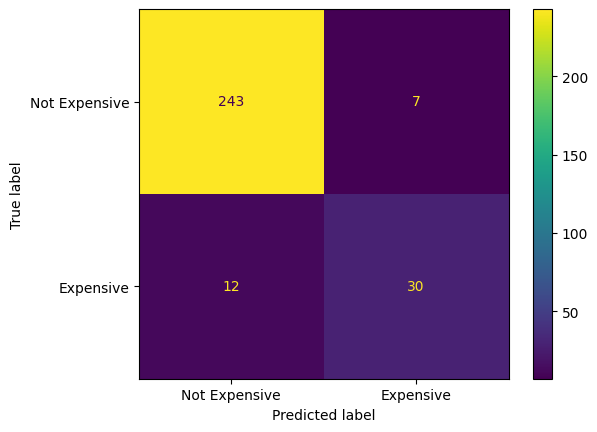

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

# This code creates a confusion matrix for the model, using the best estimator found by the RandomizedSearchCV on the test data (X_test and y_test).
# It then displays the confusion matrix, with the labels 'Not Expensive' and 'Expensive' for the two classes.
ConfusionMatrixDisplay.from_estimator(search_rand,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive', 'Expensive']);

## 2.2 K-Nearest Neighbors (KNN) classifier

The code snippet prepares and executes a grid search cross-validation for a K-Nearest Neighbors (KNN) classifier, specifying the hyperparameter grid and the preprocessing steps (including the 'preprocessor' object defined previously). The cross-validation aims to find the best hyperparameter combination for the KNN model on the given training data.

In [10]:
# Creating a full pipeline for K-Nearest Neighbors (KNN) classification including preprocessing steps and the KNN model itself
knn_full_pipeline = make_pipeline(preprocessor, # The preprocessing steps defined earlier
                                  #StandardScaler(), # (Commented out) Standardization step that could be included if needed
                                  KNeighborsClassifier() # K-Nearest Neighbors classifier
                                 )

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"], # Imputation strategies for missing values
    "kneighborsclassifier__n_neighbors": range(2, 50), # Range of number of neighbors to be considered
    "kneighborsclassifier__weights": ["uniform", "distance"] # Weighting function to be used
}

# Performing Grid Search Cross-Validation with the pipeline and parameter grid
knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=15, # Number of cross-validation folds
                      verbose=1) # Verbosity level of the output

# Fitting the model on training data to find the best parameters
knn_search.fit(X_train, y_train)

# Storing the best score found in the hyperparameter tuning
scores = knn_search.best_score_

# Outputting the best score
scores

Fitting 15 folds for each of 192 candidates, totalling 2880 fits


0.9366411366411367

### 2.2.1 Testing accuracy

This code snippet leverages the accuracy_score function from sklearn.metrics to compute the accuracy of the model by comparing its predictions on X_test to the actual labels y_test.

In [11]:
accuracy_score(knn_search.predict(X_test), y_test)

0.9383561643835616

## 2.3 Random Forest

### 2.3.1 with Grid Search

This code constructs a pipeline incorporating preprocessing steps and a RandomForest classifier. It defines a specific grid of hyperparameters and then leverages GridSearchCV to systematically explore that space to identify the best hyperparameters for the RandomForest model. The outcome includes the highest cross-validation accuracy score attained through the grid search.

In [12]:
#worst than random search when compared to test data

# Define the pipeline for preprocessing and RandomForest classification
# 'preprocessor' is previously defined and applies necessary preprocessing steps to the data
# RandomForestClassifier is initialized with 100 estimators and a specific random seed for reproducibility
rf_full_pipeline = make_pipeline(preprocessor,
                                 #StandardScaler(), # This line is commented out, so StandardScaler is not applied
                                 RandomForestClassifier(n_estimators=100, random_state = 123)
                                 )

# Define parameters for grid search
# Parameters include options for the maximum depth of the trees, minimum samples required at a leaf node,
# minimum number of samples required to split an internal node, and the function to measure the quality of a split
param_grid = {
    'randomforestclassifier__max_depth': [2, 14, 2],
    'randomforestclassifier__min_samples_leaf': [3, 12, 2],
    'randomforestclassifier__min_samples_split': [3, 40, 5],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

# Perform grid search over hyperparameters using the defined pipeline and parameter grid
# Cross-validation is performed with 15 folds, and the model is refitted with the best parameters found
# Accuracy is used as the scoring metric, and verbose output is enabled
grid_search = GridSearchCV(rf_full_pipeline,
                           param_grid,
                           cv=15,
                           refit=True,
                           scoring="accuracy",
                           verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best cross-validated score and the best hyperparameters found during grid search
scores = grid_search.best_score_
best_params = grid_search.best_params_

# 'scores' now contains the best accuracy obtained on the training data during cross-validation
scores

Fitting 15 folds for each of 54 candidates, totalling 810 fits


0.9477633477633477

#### 2.3.1.1 Testing accuracy

This code is utilizing the accuracy_score function from the scikit-learn library to calculate the accuracy of the model's predictions on the test data (X_test) compared to the actual test labels (y_test). It does this by calling the predict method on the grid_search object, which contains the best-fitted model found by the grid search.


In [13]:
# Compute and return the accuracy of the RandomForest model on the test data, using the best parameters found through GridSearch
accuracy_score(grid_search.predict(X_test), y_test)

0.9554794520547946

### 2.3.2 with Random Search

This code is used to create a RandomForest pipeline, define a space of hyperparameters, and then use RandomizedSearchCV to search over that space to find the best hyperparameters for a given RandomForest model. The final result includes the best cross-validation score obtained from the random search.







In [14]:
# Define a pipeline that will combine preprocessing steps with a RandomForestClassifier
rf_full_pipeline = make_pipeline(preprocessor, # Apply preprocessing defined earlier (e.g., scaling, encoding)
                                 #StandardScaler(), # This line is commented out, so StandardScaler will not be applied
                                 RandomForestClassifier(n_estimators=100, random_state=123) # Define RandomForestClassifier with 100 estimators and a specific random state for reproducibility
                                )

# Define hyperparameters to be tested in random search
# This includes various values for number of estimators, max depth, min samples to split, min samples per leaf, and max features
hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10, 15],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__max_features': ['sqrt', 'log2', None]
}

# Perform random search over the defined hyperparameters
# RandomizedSearchCV randomly samples from the hyperparameter space, with 50 iterations and 15-fold cross-validation
r_search = RandomizedSearchCV(rf_full_pipeline, hyperparameters, n_iter=50, cv=15, random_state=42)

# Fit the random search to the training data, identifying the best hyperparameters for the given RandomForest model
r_search.fit(X_train, y_train)

# Retrieve the best score and best parameters from the random search
scores = r_search.best_score_       # Best cross-validation score
best_params = r_search.best_params_ # Best hyperparameters found

# Display the best score
scores

0.9486291486291486

#### 2.3.2.1 Testing accuracy

This code snippet utilizes the accuracy_score function from sklearn.metrics to evaluate the accuracy of the model trained with RandomizedSearchCV. By comparing the model's predictions on the test data X_test with the actual labels y_test, it quantifies how well the model's predictions align with the true outcomes.

In [15]:
# Evaluates the accuracy of the model trained with RandomizedSearchCV on the test data (X_test) by comparing the predicted values against the true values (y_test). The result is the accuracy score, which quantifies how well the model's predictions match the actual outcomes.
accuracy_score(r_search.predict(X_test), y_test)

0.952054794520548

# 3. COMPETITION

## 3.1 uplode competition data

This code snippet demonstrates how to load a CSV file hosted on Google Drive into a pandas DataFrame by constructing the direct download link using the file's ID extracted from the URL. After reading the data into a DataFrame, a copy of it is made, and both the column names and the DataFrame itself are displayed.

In [16]:
# URL of the Google Drive file containing the data
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view?usp=share_link"

# Extracting the file ID from the URL and constructing the direct download path
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

# Reading the CSV file from the constructed path into a pandas DataFrame
Data_comp = pd.read_csv(path)

# Creating a copy of the DataFrame to work with, preserving the original
data_comp = Data_comp.copy()

# Displaying the column names of the DataFrame
data_comp.columns

# Displaying the DataFrame itself
data_comp

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,11622,80.0,882.0,2,0,0,1.0,140,120,RH,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,14267,81.0,1329.0,3,0,0,1.0,393,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,13830,74.0,928.0,3,1,0,2.0,212,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,9978,78.0,926.0,3,1,0,2.0,360,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,5005,43.0,1280.0,2,0,0,2.0,0,144,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,21.0,546.0,3,0,0,0.0,0,0,RM,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,1894,21.0,546.0,3,0,0,1.0,0,0,RM,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,20000,160.0,1224.0,4,1,0,2.0,474,0,RL,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,10441,62.0,912.0,3,0,0,0.0,80,0,RL,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [17]:
# Dropping the specified columns ["MoSold", "YrSold", "GarageYrBlt", "GarageArea"] from the DataFrame 'data_comp'
data_comp = data_comp.drop(columns=["MoSold", "YrSold", "GarageYrBlt", "GarageArea"])

# Changing the data type of the 'MSSubClass' column to 'object'
# This could be done to treat this particular column as a categorical variable rather than a numerical one
data_comp['MSSubClass'] = data_comp['MSSubClass'].astype('object')

In [18]:
# Removing the 'Id' column from 'data_comp' DataFrame and storing it in the 'id_comp' variable
id_comp = data_comp.pop('Id')

# Assigning the remaining data from 'data_comp' (after removing the 'Id' column) to 'X_test_comp'
X_test_comp = data_comp

In [19]:
# Using the previously trained 'grid_search' model to make predictions on the 'X_test_comp' dataset, and storing the predicted values in the 'y_test_pred' variable
y_test_pred = grid_search.predict(X_test_comp)

In [20]:
# This line simply references the variable 'y_test_pred', which contains the predicted values (or labels) obtained from a previously trained model. It doesn't perform any operation or have any effect on its own.
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
# Creating a new DataFrame 'my_comp_df' with 'id_comp' as its content, likely representing unique identifiers such as product or transaction IDs.
my_comp_df = pd.DataFrame(id_comp)

# Adding a new column 'Expensive' to the DataFrame 'my_comp_df' and filling it with the values from 'y_test_pred'. This could represent a predicted classification or score, perhaps indicating whether an item is considered expensive or not.
my_comp_df['Expensive'] = y_test_pred

# Displaying the DataFrame 'my_comp_df' to the output. This would show the ID paired with the corresponding prediction, giving a clear view of how each item was classified or scored by the model.
my_comp_df

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [22]:
# Saving the DataFrame 'my_comp_df' to a CSV file named 'my_comp_df_rf_1.csv' in the current working directory. The 'index=False' argument ensures that the index column is not included in the exported file.
my_comp_df.to_csv('my_comp_df_rf_1.csv', index=False)

In [23]:
# Importing the 'files' module from the 'google.colab' package
from google.colab import files

# Triggering the download of the 'my_comp_df_rf_1.csv' file to the user's local machine
# This will prompt the user to download the file directly from the Colab environment
files.download('my_comp_df_rf_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Results

2nd place with first submission of Agata and Tania team.

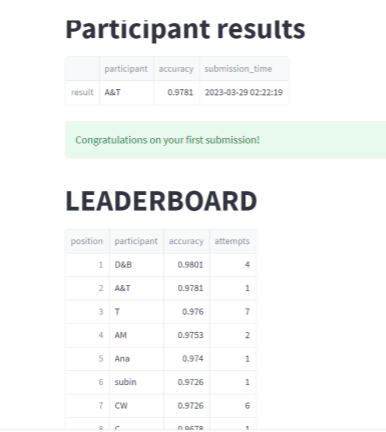